# Mods

In [2]:
# pip install Dask ;
# pip install pysqlite ;
# pip install pandas ;
# pip install scikit-learn ;
# pip install group_lasso ;
# pip install numpy
# pip install asgl
# pip install groupry 

In [28]:
import numpy as np
import pandas as pd
# import asgl
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from patsy import dmatrix
from patsy.contrasts import Helmert

import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
Df = pd.read_csv("/home/r00323024/Xwines/Xwines(1).csv")


In [3]:
Df

,RatingID,UserID,WineID,Vintage,Rating,Date,WineName,Type,Elaborate,Grapes,...,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52,Lambrusco Emilia,Red,Varietal/100%,['Lambrusco'],...,Full-bodied,High,IT,Italy,1581,Emilia,42951,Riunite,http://www.riunite.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33,Lambrusco Emilia,Red,Varietal/100%,['Lambrusco'],...,Full-bodied,High,IT,Italy,1581,Emilia,42951,Riunite,http://www.riunite.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55,Terrantez Madeira,Dessert/Port,Varietal/100%,['Terrantez'],...,Very full-bodied,High,PT,Portugal,1056,Madeira,12993,D'Oliveiras,NaN,"[2021, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22,Lambrusco Emilia Rosé,Rosé,Varietal/100%,['Lambrusco'],...,Full-bodied,Low,IT,Italy,1581,Emilia,42951,Riunite,http://www.riunite.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14,Pomerol,Red,Varietal/100%,['Merlot'],...,Full-bodied,Medium,FR,France,1404,Pomerol,30059,Pétrus,http://www.moueix.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571140,20571141,1828380,193501,2021,4.0,2021-11-14 09:04:04,Sauvignon Blanc,White,Varietal/100%,['Sauvignon Blanc'],...,Light-bodied,High,NZ,New Zealand,2485,Marlborough,69390,Stoneleigh,http://www.stoneleigh.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
20571141,20571142,1141884,168523,2021,3.5,2021-12-26 01:49:07,Cafayate Torrontés,White,Varietal/100%,['Torrontés'],...,Medium-bodied,Medium,AR,Argentina,2047,Cafayate Valley,60402,Bodegas Etchart,http://www.bodegasetchart.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
20571142,20571143,2061320,167430,2021,3.5,2021-10-12 20:49:11,Vineyards Malbec,Red,Varietal/100%,['Malbec'],...,Very full-bodied,High,AR,Argentina,2058,Mendoza,60494,Trapiche,http://www.trapiche.com.ar,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
20571143,20571144,1007824,168007,2021,5.0,2021-12-05 00:06:34,Red Blend,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Malbec']",...,Full-bodied,High,AR,Argentina,2058,Mendoza,61465,Circus,NaN,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


# data process

In [51]:
df = Df.copy()
df = df[df["Vintage"] != "N.V."]


df["Vintage"] = pd.to_numeric(df["Vintage"])


df = df[df['Vintage'] >= 2008]


df["Vintage"] = df["Vintage"].astype(str)


df['Date'] = pd.to_datetime(df['Date'])


df['min_date'] = df.groupby(['Vintage', 'UserID', 'WineName'])['Date'].transform('min')


df = df[df['Date'] == df['min_date']]


df = df.drop_duplicates(subset=['Vintage', 'UserID', 'WineName'])


Type = ['Red', 'White']
df = df[df['Type'].isin(Type)]
        

winery_counts = df.groupby("WineryName").size()


df['amount'] = df['WineryName'].map(winery_counts)


df = df[df['amount'] >= 20000]


labels = df['WineryName'] + ' ' + df['Vintage']
df["Label"] = labels

# scaler = StandardScaler()
# df['Rating'] = scaler.fit_transform(df[['Rating']])

In [52]:
df

,RatingID,UserID,WineID,Vintage,Rating,Date,WineName,Type,Elaborate,Grapes,...,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages,min_date,amount,Label
1426504,1426505,1672391,179554,2008,5.0,2015-03-26 19:42:36,Private Reserve Chardonnay,White,Varietal/100%,['Chardonnay'],...,United States,1848,Napa Valley,53362,Beringer,http://www.beringer.com,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...",2015-03-26 19:42:36,31381,Beringer 2008
1426505,1426506,1427084,162594,2008,3.0,2014-01-04 02:27:59,Grey (Glacier) Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],...,Chile,2276,Maipo Valley,40100,Ventisquero,http://www.ventisquero.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2014-01-04 02:27:59,36001,Ventisquero 2008
1426506,1426507,1198563,102349,2008,4.0,2015-09-17 18:16:01,Hexagon Tinto,Red,Assemblage/Blend,"['Trincadeira', 'Syrah/Shiraz', 'Tannat', 'Tou...",...,Portugal,1062,Península de Setúbal,12408,José Maria da Fonseca,http://www.jmf.pt,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2015-09-17 18:16:01,24795,José Maria da Fonseca 2008
1426516,1426517,1479700,168244,2008,5.0,2014-04-08 18:41:28,Terroir Series Jorge Miralles Malbec,Red,Varietal/100%,['Malbec'],...,Argentina,2058,Mendoza,60494,Trapiche,http://www.trapiche.com.ar,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2014-04-08 18:41:28,60441,Trapiche 2008
1426518,1426519,1985999,155294,2008,4.0,2014-04-08 18:41:31,Coto de Imaz Rioja Reserva,Red,Varietal/100%,['Tempranillo'],...,Spain,2014,Rioja,37962,El Coto,http://www.elcoto.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2014-04-08 18:41:31,25108,El Coto 2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571126,20571127,1152677,162565,2021,4.0,2021-11-21 22:38:49,(3) Tres Medallas Carmenère,Red,Varietal/100%,['Carmenère'],...,Chile,2276,Maipo Valley,39328,Santa Rita,http://www.santarita.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2021-11-21 22:38:49,58282,Santa Rita 2021
20571134,20571135,1009468,162568,2021,4.0,2021-11-06 16:41:06,Tantehue Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],...,Chile,2276,Maipo Valley,40100,Ventisquero,http://www.ventisquero.com,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2021-11-06 16:41:06,36001,Ventisquero 2021
20571135,20571136,1082434,162955,2021,4.0,2021-11-15 23:32:24,Cosecha Chardonnay,White,Varietal/100%,['Chardonnay'],...,Chile,2276,Maipo Valley,39563,Tarapacá,http://www.tarapaca.cl,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2021-11-15 23:32:24,53886,Tarapacá 2021
20571139,20571140,1995583,138298,2021,3.0,2021-11-21 19:08:57,News Novello,Red,Assemblage/Blend,"['Montepulciano', 'Sangiovese']",...,Italy,1501,Abruzzo,40512,Farnese,http://www.farnesevini.it,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...",2021-11-21 19:08:57,22856,Farnese 2021


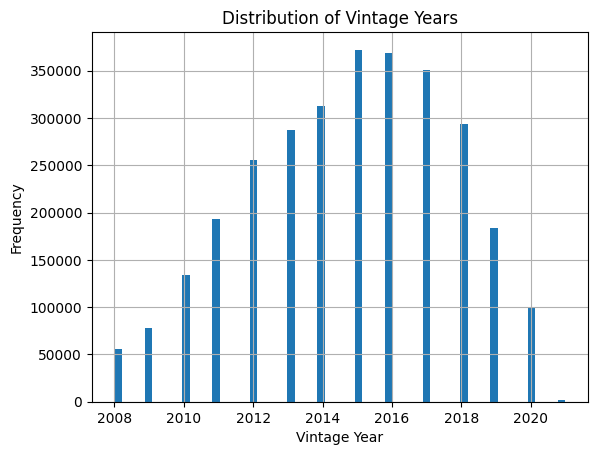

In [17]:
# stat plot

df["Vintage"]=df["Vintage"].astype(int)
df['Vintage'].hist(bins=60)  # bins參數控制直方圖中的條柱數量
plt.title('Distribution of Vintage Years')
plt.xlabel('Vintage Year')
plt.ylabel('Frequency')
plt.show()


In [53]:
columns_to_drop = ["RatingID","WineID","Date","Elaborate", "Grapes","Harmonize","ABV","Code","RegionID","RegionName", "Website" ,"WineryID","Vintages","min_date","amount"]
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
if columns_to_drop_existing:
    df.drop(columns=columns_to_drop_existing, inplace=True)

In [54]:
#去識別化

columns_to_group = ["Vintage" ,'WineName','Type','Body','Acidity','Country',"WineryName","Label"]
df =df.groupby(columns_to_group)['Rating'].mean().reset_index()

In [15]:
# def abv_category(abv):
#     if abv < 4:
#         return '0-3.99%'
#     elif abv < 8:
#         return '4-7.99%'
#     elif abv < 12:
#         return '8-11.99%'
#     elif abv < 16:
#         return '12-15.99%'
#     elif abv < 20:
#         return '16-19.99%'
#     else:
#         return '20%以上'

# df['ABV'] = df['ABV'].apply(abv_category)


# OLS

In [55]:
%load_ext sql
%sql sqlite://

conn = sqlite3.connect(':memory:')  # Use ':memory:' for in-memory database

df.to_sql('table1', conn, index=False, if_exists='replace')

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


34680

In [56]:
Rating = pd.read_sql_query("SELECT Rating FROM table1;", conn)
Type = pd.read_sql_query("SELECT Type FROM table1;", conn)
Acidity = pd.read_sql_query("SELECT Acidity FROM table1;", conn)
Body = pd.read_sql_query("SELECT Body FROM table1;", conn)
Label = pd.read_sql_query("SELECT Label FROM table1;", conn)


In [57]:
Type_dum = dmatrix('C(Type, Helmert)', Type, return_type='dataframe').iloc[:, 1:] 
Acidity_dum = dmatrix('C(Acidity, Helmert)', Acidity, return_type='dataframe').iloc[:, 1:]  
Body_dum = dmatrix('C(Body, Helmert)', Body, return_type='dataframe').iloc[:, 1:]  
Label_dum = dmatrix('C(Label, Helmert)', Label, return_type='dataframe').iloc[:, 1:]  # 去掉截距列

In [43]:
Type_dum = pd.get_dummies(Type,drop_first=True, sparse=True).astype(int)
Acidity_dum = pd.get_dummies(Acidity,drop_first=True, sparse=True).astype(int)
Body_dum = pd.get_dummies(Body,drop_first=True, sparse=True).astype(int)
Label_dum = pd.get_dummies(Label,drop_first=True, sparse=True).astype(int)

In [58]:
test_df = pd.DataFrame(index=Type_dum.index)

dfs = [Type_dum,Acidity_dum,Body_dum,Label_dum] 
for i in dfs:
    test_df = pd.concat([test_df, i], axis=1)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34680 entries, 0 to 34679
Columns: 1259 entries, C(Type, Helmert)[H.White] to C(Label, Helmert)[H.Zuccardi 2021]
dtypes: float64(1259)
memory usage: 333.4 MB


In [59]:
X = sm.add_constant(test_df)  
y = Rating

In [60]:

model = sm.OLS(y, X)
results = model.fit()

def format_pvalues(pval):
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''


summary = results.summary()

tables = summary.tables[1].data  
headers = tables.pop(0)  
Result = pd.DataFrame(tables, columns=headers)

Result['P>|t|'] = Result['P>|t|'].astype(float).apply(lambda x: f"{x:.3f}" + format_pvalues(x))


In [62]:

file_path = "/home/r00323024/OLS1.txt"
with open(file_path, "w") as f:
     f.write(Result.to_string())

adjusted_r_squared = results.rsquared_adj
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.2524884272066451


# LASSO

In [14]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建带交叉验证的LASSO模型，这里设置交叉验证的折数为5
lasso_cv = LassoCV(cv=5, random_state=42)

# 拟合模型
lasso_cv.fit(X_train, y_train)

# 查看最佳的alpha值
best_alpha = lasso_cv.alpha_
print("Best alpha found through cross-validation:", best_alpha)

# 使用找到的最佳alpha值在测试集上评估模型
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Best alpha found through cross-validation: 2.8602670351817206e-05
Mean Squared Error on Test Set: 0.3548152215626057


In [15]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 重新使用最佳 alpha 值创建 LASSO 模型
lasso = Lasso(alpha=2.8602670351817206e-05)

# 在整个训练集上重新训练模型
lasso.fit(X_train, y_train)

# 对测试集进行预测
y_pred = lasso.predict(X_test)

# 计算 Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# 将结果和一些模型细节保存到 DataFrame
results_df = pd.DataFrame({
    "Best Alpha": [2.8602670351817206e-05],
    "Test MSE": [mse],
    "Coefficients": [lasso.coef_]
})

# 指定文件路径
file_path = "/home/r00323024/LASSORW.txt"

# 将结果写入文件
with open(file_path, "w") as f:
    f.write(results_df.to_string())


Mean Squared Error on Test Set: 0.3548152215626057


# SGL

In [36]:
y = Rating.values
X = final_df.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)


ranges = [
    (0, 4), # Type
    (5,8), # Body
    (9, 10), # Acidity
    (11, 1545), #Grapes
    (1546, 1616), # Vintage
    (1617, 1626), # Region
    (1627, 2308) # Region_Vintage
]
arrays = [np.arange(start, end + 1) for start, end in ranges]
arrays

In [ ]:
import groupyr as gpr
# Fit an SGL model for this data
cv = KFold(n_splits=5, shuffle=True, random_state=1729) 
sgl = gpr.SGLCV(
    groups=arrays).fit(X, y)

In [44]:
import asgl
lambda1 = (10.0 ** np.arange(-3, 1.51, 0.2)) # 23 possible values for lambda
alpha = np.arange(0, 1, 0.05) # 20 possible values for alpha

# Define model parameters
model = 'lm'  # linear model
penalization = 'sgl'  # sparse group lasso penalization
parallel = True  # Code executed in parallel
error_type = 'MSE'  # Error measuremente considered. MSE stands for Mean Squared Error.


In [46]:


X, y, groups, coef = gpr.datasets.make_group_regression(
    n_samples=400,
    n_groups=50,
    n_informative_groups=5,
    n_features_per_group=20,
    n_informative_per_group=18,
    noise=500,
    coef=True,
    random_state=10,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

# Fit an SGL model for this data
cv = KFold(n_splits=5, shuffle=True, random_state=1729)  # Set shuffle=True here
sgl = gpr.SGLCV(
    groups=groups, cv=cv, l1_ratio=[0.0, 1.0], tuning_strategy="bayes", n_bayes_iter=50
).fit(X_train, y_train)




# Stat

In [ ]:

# plt.figure(figsize=(12, 36)) 

# plt.subplot(6, 1, 1)  
# sns.distplot(df['ABV'])

# plt.subplot(6, 1, 2)  
# sns.histplot(df2['Body'], bins=len(df2['Body'].unique()))
# plt.xticks(rotation=45)

# plt.subplot(6, 1, 3)  
# sns.histplot(df2['Acidity'], bins=len(df2['Acidity'].unique()))

# plt.subplot(6, 1, 4)  
# sns.histplot(df2['Type'], bins=len(df2['Type'].unique()))

# plt.subplot(6, 1, 5)  # 6行1列的第5張圖
# sns.histplot(df2['Country'], bins=len(df2['Country'].unique()))
# plt.xticks(rotation=90)  # 旋轉標籤以避免重疊

# plt.subplot(6, 1, 6)  # 6行1列的第6張圖
# sns.histplot(df2['Elaborate'], bins=len(df2['Elaborate'].unique()))
# plt.xticks(rotation=45)

# plt.tight_layout()  # 調整子圖之間的間距
# plt.show()


In [32]:
def count(column_name, dataframe):
    return len(dataframe[column_name].unique())

cols = ["Type", "Body","Acidity","Grapes", "Vintage","Region","Region_Vintage" ,"WineryName" , "WineryName_Vintage"]

for i in cols:
    print(f"Number of unique values in {i}: {count(i, dfnew)}")

Number of unique values in Type: 6
Number of unique values in Body: 5
Number of unique values in Acidity: 3
Number of unique values in Grapes: 1536
Number of unique values in Vintage: 72
Number of unique values in Region: 12
Number of unique values in Region_Vintage: 752
Number of unique values in WineryName: 5795
Number of unique values in WineryName_Vintage: 127577


In [6]:
# unique_wines = df["WineName"].unique()
# file_path = "/home/r00323024/unique_wines.txt"
# with open(file_path, "w") as f:
#     for wine in unique_wines:
#         f.write(f"{wine}\n")

# Grapes = df["Grapes"].unique()
# file_path = "/home/r00323024/unique_Grapes.txt"
# with open(file_path, "w") as f:
#     for Grape in Grapes:
#         f.write(f"{Grape}\n")

# Vintage = dfnew["Vintage"].unique()
# file_path = "/home/r00323024/unique_Vintage.txt"
# with open(file_path, "w") as f:
#     for i in Vintage:
#         f.write(f"{i}\n")

# WineryName = df["WineryName"].unique()
# file_path = "/home/r00323024/unique_WineryName.txt"
# with open(file_path, "w") as f:
#     for i in WineryName:
#         f.write(f"{i}\n")

# Country = df["Country"].unique()
# file_path = "/home/r00323024/unique_Country.txt"
# with open(file_path, "w") as f:
#     for i in Country:
#         f.write(f"{i}\n")

In [7]:
# grape_varieties = dfnew["Grapes"]

# # We need to convert the strings back to lists and flatten them to count unique grapes
# all_grapes = set()

# for line in grape_varieties:
#     # Convert the string list representation to an actual list
#     variety_list = ast.literal_eval(line.strip())
#     # Add each variety in the list to a set to ensure uniqueness
#     for variety in variety_list:
#         all_grapes.add(variety)

# # Count of unique grape varieties
# total_unique_grapes = len(all_grapes)
# all_grapes, total_unique_grapes

# file_path = "/home/r00323024/unique_Grape.txt"
# with open(file_path, "w") as f:
#     for i in all_grapes:
#         f.write(f"{i}\n")